## Import des librairies

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [158]:
pd.set_option('max_columns', 100)

## Chargement des données

In [159]:
train_df = pd.read_csv("train.csv", sep=",")
test_df = pd.read_csv("test.csv", sep=",")

In [160]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualisation des données

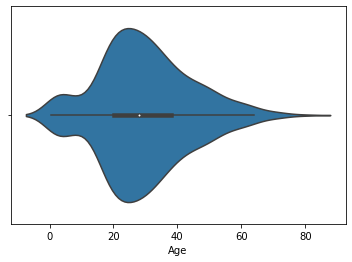

In [162]:
import seaborn as sns
sns.violinplot(train_df["Age"])

## Preparation des données

Premier exemple d'étape de préparation :

In [163]:
train_df = train_df[pd.notnull(train_df["Age"])]# suppression des exemples où le label est vide

In [164]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [165]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())

In [166]:
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())

In [167]:
train_df["Sex"] = train_df["Sex"].replace("male", 1)
train_df["Sex"] = train_df["Sex"].replace("female", 0)

In [168]:
test_df["Sex"] = test_df["Sex"].replace("male", 1)
test_df["Sex"] = test_df["Sex"].replace("female", 0)

In [169]:
train_df_index = train_df["PassengerId"]
test_df_index = test_df["PassengerId"]

In [170]:
train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"])
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"])

In [171]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Machine Learning

### Train / Test Split

In [172]:
X_train, Y_train = train_df.drop(columns="Survived"), train_df["Survived"]

In [173]:
X_val = test_df

### Regression linéaire

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
LR_model = LogisticRegression(max_iter=1000)

In [176]:
LR_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
Y_test_predicted = LR_model.predict(X_val) # utilisation du modèle sur le jeu de test

## Visualisation des résultats


In [189]:
final = test_df_index.to_frame()

In [190]:
final["Survived"] = Y_test_predicted

In [191]:
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [194]:
final.to_csv("out.csv", index=None, header=True)

# Comparaison de modèles

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
# models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
# models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
# models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
# models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
# models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [44]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=5, random_state=0)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

c:\users\epona\miniconda3\envs\formation-ml\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\epona\miniconda3\envs\formation-ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\epona\miniconda3\envs\formation-ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (st

Logistic Regression: 46.373478510178025
Naive Bayes: 38.07497328433289
K-Nearest Neighbour: 45.53102275392916
Decision Tree: 58.78473036724269
Support Vector Machine-linear: 52.093433158704094
